# CMSC478 Machine Learning

# Project Final Submission

## Project Title

Tim Rice
UX75258

## Problem Description

This project is a multi-class classification problem because the target feature is different ranges of money spent.


The goal of this project is to predict the amount of money players will spend on the game "Fire Emblem: Heroes" (FEH) based on a survey of over 4,500 people who played the game. Due to the structure of the survey this will actually be a classification problem rather than regression, because the survey separated money spent into different ranges of money which will each serve as a class for classification.

## Motivation

FEH is a mobile game that uses the "gacha" model, a model in which the game is free to download but players have the option of making in game transactions that cost real money. The term gacha comes from gachapon, which refers to machines that give a random reward for some amount of money. In a gacha game, in game currency is exchanged for random rewards, and while in-game currency can be earned for free in game, players are allowed to purchase more in exchange for real money. Because the amount of free currency is limited, some players spend exorbinant amount of money on in-game currency hoping for a reward that they want. This model is often classified as a form of gambling, which many countries ban, however despite anti-gambling laws many gacha games still find their way into the market and have become espescially prominent on the mobile platform. The gacha model relies on the extremely small portion of players who spend extremely large amounts of money on the game in hopes off getting what they want. These players may come from different finanical situations, but all exhibit the same dangerous gambling behavior that the gacha model preys off of. By surveying people who play these games, you could use a machine learning approach to detect players that may be at risk for such behavior and try to intervene before potenially bad circumstances arise.

## Dataset

 - Link to dataset source: https://www.kaggle.com/natalieytan/fire-emblem-heroes-survey/version/1

- <b>Label/target</b> description - The target feature will be "How much money have you spent on the game?". It is a set of ranges that will be given a numeric identifier and used as the target of a multi-class classification problem.


- Feature description: Each Feature in this dataset is an answer to a question in a survey. There are 104 features in the dataset so I will not describe each one. The first feature is a timestamp and will be discarded. The rest are survey questions. The questions consist of either multiple choice or numerical answer questions, and as such can all be relatively easily transformed into a numeric representation. Multiple choice questions will be transformed by giving each choice a numeric identifier.



- Include the code for loading, showing the data head (if loaded with pandas) and reporting the data shape via sklearn, pandas or tensorflow in the following cell. 


- For image classification or special non-pandas datasets, show at least one sample of the data.


- <b>Your data should be loaded error-free (otherwise your whole project gets zero credit). You should attach the data to your final project submission in a zip file.</b> If your dataset is too large and can't be uploaded in Blackboard, you should email the dataset to the instructor BEFORE the deadline!

## <font color="red"> Required Coding

In [1]:
# Import necessary Python, sklearn and/or tensorflow/keras modules for loading the dataset
import numpy
from sklearn.model_selection import train_test_split
import sklearn.metrics
import pandas
import matplotlib.pyplot as plt
import tensorflow

# Load the data
df = pandas.read_csv('FEHSurvey8All.csv')

# Print data shape via built-in methods of sklearn, pandas or tensorflow/keras (or other modules)
df.shape

(4677, 104)

In [2]:
# Show the data head (if pandas is used)
df.head
# If the dataset contains images or is non-pandas/non-tabular, show at least one sample of the data

<bound method NDFrame.head of                 Timestamp  \
0      11/13/2017 8:20:14   
1      11/13/2017 8:20:42   
2      11/13/2017 8:20:58   
3      11/13/2017 8:21:05   
4      11/13/2017 8:22:59   
...                   ...   
4672  11/16/2017 12:10:05   
4673  11/16/2017 12:19:16   
4674  11/16/2017 13:16:43   
4675  11/16/2017 14:28:33   
4676  11/16/2017 17:32:39   

     When did you begin playing your main account in Fire Emblem: Heroes?  \
0                                                   May                     
1                      Within 1 Week of Release (Feb 2)                     
2                      Within 1 Week of Release (Feb 2)                     
3                      Within 1 Week of Release (Feb 2)                     
4                         February (After Release Week)                     
...                                                 ...                     
4672                   Within 1 Week of Release (Feb 2)                     
4673 

## Data Preprocessing

List any steps you have taken for preprocessing, such as cleaning, dropping NAs, dropping any redundant/irrelevant column, normalizing/scaling, etc. HERE:

- Preprocessing Steps:
    1. Dropped "Timestamp" feature.
    2. Took steps required to convert "What is your current Arena tier? (For the season beginning Nov 14th)" to solely numeric data.
    3. Converted remaining non-numeric data types into categorical integer data types.
<br><br>

- Specify the details of data splitting to train/test or cross validation. Mention the ratio for splitting and number of folds for cv.
 - splitting done using train_test_split with 20% reserved for testing.
<br>

<b>Notice:</b> Each dataset may or may not need specific preprocessing steps. You should decide which preprocessing steps (if any) is required for your particular dataset.

## <font color="red"> Required Coding

In [3]:
# Data Preprocessing code here

# Drop rows that did not answer the target question and drop the timestamp column because it is not good data to 
# base a prediction on.
df.dropna(inplace = True, subset = ["How much money have you spent on the game?"])
df.drop(inplace = True, columns = ["Timestamp"])

df.fillna(-1, inplace = True)

# Giving one column some special treatment because it should be an ordered list of numbers and not categorized.
df["What is your current Arena tier? (For the season beginning Nov 14th)"].replace("I don't know", 0, inplace = True)
df["What is your current Arena tier? (For the season beginning Nov 14th)"] = \
    df["What is your current Arena tier? (For the season beginning Nov 14th)"].astype(int)

print(df.shape)
for n in df.dtypes: print(n)

(4668, 103)
object
object
object
object
int32
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
float64
float64
object
object
object
object
object
object
object
object
object
object
float64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
float64
object
object
object
object
object
float64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object


In [4]:
# Create int lables for non numeric data, leaving all numeric data alone.
# Create a dictionary of the mappings for reference later.

featureDict = {}

answerDict = {}
featureName = ""

data = df.values

for col in range(0, data.shape[1]):
    if(df.dtypes[col] == "object"):
        featureName = df.columns[col]
        n = 1

        for row in range(0,data.shape[0]):
            value = data[row][col]
            if(value not in answerDict):
                answerDict.update({value:n})
                n = n + 1
            data[row][col] = answerDict[value]

        featureDict.update({featureName:answerDict.copy()})
        answerDict = {}

print(len(featureDict))
data = data.astype(int)
print(data.shape)
print(data[0:5,:])
targetLabels = featureDict["How much money have you spent on the game?"]
targetLabels.items()

97
(4668, 103)
[[ 1  1  1  1 18  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  2  1  1  1  1  1  5  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1]
 [ 2  2  2  2 20  2  2  2  1  2  1  1  1  2  2  2  2  2  2  2  2  2  1  1
   2  4  2  1  2  2  2  2  2  1  2  2  2  1  2  2  2  2  2  2  2  2  2  2
   2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  2  2
   2  2  5  2  2  2  2  1  5  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2
   2  2  2  2  2  2  2]
 [ 2  2  2  2 20  3  1  3  1  3  2  1  1  3  2  3  3  3  3  3  3  1  2  1
   3  4  2  2  1  3  3  1  1  2  1  3  2  2  2  3  3  2  2  2  3  2  2  2
   2  2  2  2  2  2  2  2  3  3  2  3  3  2  2  2  2  1  1  1  1  1  2  2
   2  2  4  3  3  3  3  2  4  2  1  1  1  1  3  3  3  2  3  3  3  3  3  3
   3  3  3  3  3  2  3]
 [ 2  3  2  2 19  1  1  2

dict_items([('$201 - $400', 1), ('$1 - $50', 2), ('$401 - $600', 3), ('$51 - $100', 4), ('$101 - $200', 5), ('None (F2P)', 6), ("I don't know / don't remember", 7), ('$601 - $800', 8), ('$3001 - $4000', 9), ('$801 - $1000', 10), ('$1001 - $2000', 11), ('$5000+', 12), ('$2001 - $3000', 13), ('$4001 - $5000', 14)])

In [5]:
# Split to train/test sets code here (if applicable)
X = numpy.delete(data, 1, 1)
y = data[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 50)

## Methods

List your sklearn and tensorflow methods HERE:

1- Sklearn Method No.1: SVM

2- Sklearn Method No.2: Random Forest

3- Tensorflow Method: Sequential Neural Network

Individual students need to work with 2 sklearn methods and 1 tensorflow method.

Groups should take 2 approaches (both classification and regression) on 1 or 2 datasets, and for each approach (classification/regression) should use 3 methods as described above (6 methods totally).

<b>Notice:</b> You should fine-tune at least one hyperparameter of each method by using multiple values (at least 3 different values).

## <font color="red"> Required Coding - Groups should add more cell as required

In [6]:
# Sklearn Method 1 code here
from sklearn import svm

# Method 1 classifier 1
SVMClassifier = svm.SVC(kernel='rbf', gamma=10, C=10)
SVMClassifier.fit(X_train, y_train)

y_pred = SVMClassifier.predict(X_test)

acc_svm = sklearn.metrics.accuracy_score(y_test, y_pred)
f1_svm = sklearn.metrics.f1_score(y_test, y_pred, average = "macro")

print("Accuracy: ", acc_svm)
print("F1 score: ", f1_svm)
y_pred

Accuracy:  0.4282655246252677
F1 score:  0.05287015615962984


c:\users\trice\anaconda3\envs\tfvenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

In [7]:
# Method 1 classifier 2
SVMClassifier = svm.SVC(kernel='poly', degree = 3, gamma=10, C=10)
SVMClassifier.fit(X_train, y_train)

y_pred = SVMClassifier.predict(X_test)

acc_svm = sklearn.metrics.accuracy_score(y_test, y_pred)
f1_svm = sklearn.metrics.f1_score(y_test, y_pred, average = "macro")

print("Accuracy: ", acc_svm)
print("F1 score: ", f1_svm)

Accuracy:  0.26124197002141325
F1 score:  0.08733918409922412


c:\users\trice\anaconda3\envs\tfvenv\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [8]:
# Method 1 classifier 3
SVMClassifier = svm.SVC(kernel='sigmoid', gamma=10, C=10)
SVMClassifier.fit(X_train, y_train)

y_pred = SVMClassifier.predict(X_test)

acc_svm = sklearn.metrics.accuracy_score(y_test, y_pred)
f1_svm = sklearn.metrics.f1_score(y_test, y_pred, average = "macro")

print("Accuracy: ", acc_svm)
print("F1 score: ", f1_svm)

Accuracy:  0.4261241970021413
F1 score:  0.04596904596904597


c:\users\trice\anaconda3\envs\tfvenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
# Sklearn Method 2 code here
from sklearn.ensemble import RandomForestClassifier

# Method 2 classifier 1
rf_clf = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = 16, n_jobs = -1, random_state = 50)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

acc_rf = sklearn.metrics.accuracy_score(y_test, y_pred)
f1_rf = sklearn.metrics.f1_score(y_test, y_pred, average = "macro")

print("Accuracy: ", acc_rf)
print("F1 score: ", f1_rf)

Accuracy:  0.4261241970021413
F1 score:  0.04596904596904597


c:\users\trice\anaconda3\envs\tfvenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
# Method 2 classifier 2
rf_clf = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = 50, n_jobs = -1, random_state = 50)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

acc_rf = sklearn.metrics.accuracy_score(y_test, y_pred)
f1_rf = sklearn.metrics.f1_score(y_test, y_pred, average = "macro")

print("Accuracy: ", acc_rf)
print("F1 score: ", f1_rf)

Accuracy:  0.4282655246252677
F1 score:  0.05503801334617045


c:\users\trice\anaconda3\envs\tfvenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
# Method 2 classifier 3
rf_clf = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = 465, n_jobs = -1, random_state = 50)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

acc_rf = sklearn.metrics.accuracy_score(y_test, y_pred)
f1_rf = sklearn.metrics.f1_score(y_test, y_pred, average = "macro")

print("Accuracy: ", acc_rf)
print("F1 score: ", f1_rf)
y_pred

Accuracy:  0.45717344753747324
F1 score:  0.10117022550224708


c:\users\trice\anaconda3\envs\tfvenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  6,  2,  6,  6,  6,  6,
        6,  1,  6,  6,  6,  6,  6,  6,  6,  6,  6, 11,  2,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  3,  6,  6,  6,  6,  6,  6,  6,  5,
        6,  6,  2,  6,  6,  6,  1,  3,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        3,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 11,  6,  6,  6,
        6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        2,  6,  6,  6,  5,  6,  6,  6,  6,  5,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  1,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  3,  6, 11,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  1,  6,  6,  6,  6,  5,
        6,  6,  6,  1, 11,  6,  1,  6,  6,  6,  5,  6,  6,  6,  6,  6,  6,
        6,  6,  2,  6,  5,  6,  6,  6,  6,  6,  3,  6,  6,  6,  6,  2,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        5,  6,  6,  6,  6

In [12]:
# Get feature_importances for all features, then print in order of most important to least important
scores = []
for name, score in zip(df.drop("How much money have you spent on the game?", axis = 1), rf_clf.feature_importances_):
    scores.append([name, score])
scores.sort(key=lambda x:x[1])
i = len(scores) - 1
while(i >= 0):
    print(scores[i])
    i = i - 1

['Did you spend money on Orbs specifically for the Trick or Defeat banner?', 0.07047846518129212]
['Horse Emblem (3+ Cavalry Units): Check all that apply:', 0.02607208890530828]
['Who is your FAVORITE hero?', 0.02394008663036602]
['Which of the following Bonus Units did you use? Select all that apply', 0.02385797449868609]
['Who is your MOST WANTED hero?', 0.023826150894906303]
['Who is the most UNDERRATED hero?', 0.023310547771419738]
['Intelligent Systems comes to you with the offer to make a winter holidays version of any hero you choose. Who do you pick?', 0.022698968097748663]
['Which of the following banners have you used orbs on at least once? Select all that apply.', 0.021925530252225135]
["What is the highest merge level you've achieved on a 5* unit?", 0.021658745654487683]
['Armor Emblem (3+ Armor Units): Check all that apply:', 0.020376851388328333]
['Who is the most OVERRATED hero?', 0.020341541053560234]
['Flier Emblem (3+ Flier Units): Check all that apply:', 0.0200110144

In [13]:
# Tensorflow/keras Method code here
train_tensor = tensorflow.data.Dataset.from_tensor_slices((X_train, y_train))
test_tensor = tensorflow.data.Dataset.from_tensor_slices((X_test, y_test))

train_batch = train_tensor.shuffle(len(X_train)).batch(5)
test_batch = test_tensor.shuffle(len(X_test)).batch(5)

In [14]:
#Method 3 classifier 1
nn_clf = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(units = 50, input_dim = 102, activation = tensorflow.keras.layers.LeakyReLU(alpha=0.1)),
    tensorflow.keras.layers.Dense(units = 30, activation = tensorflow.keras.layers.LeakyReLU(alpha=0.1)),
    tensorflow.keras.layers.Dense(units = 20, activation = tensorflow.keras.layers.LeakyReLU(alpha=0.1)),
    tensorflow.keras.layers.Dense(units = 14, activation = "softmax"),
    ])

nn_clf.compile(optimizer='adam', loss=tensorflow.keras.losses.CategoricalCrossentropy(), learning_rate = .5, metrics=['accuracy'])

nn_clf_history = nn_clf.fit(train_batch, epochs = 10)

score = nn_clf.evaluate(test_batch)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
747/747 [==============================] - 2s 3ms/step - loss: 45341046.9665 - accuracy: 0.0000e+00
Epoch 2/10
747/747 [==============================] - 1s 1ms/step - loss: 573706625.8481 - accuracy: 0.0000e+00
Epoch 3/10
747/747 [==============================] - 1s 1ms/step - loss: 1810913440.9119 - accuracy: 0.0000e+00
Epoch 4/10
747/747 [==============================] - 1s 1ms/step - loss: 3688391664.6650 - accuracy: 0.0000e+00
Epoch 5/10
747/747 [==============================] - 1s 1ms/step - loss: 6016344595.9670 - accuracy: 0.0000e+00
Epoch 6/10
747/747 [==============================] - 1s 1ms/step - loss: 8963784527.5834 - accuracy: 0.0000e+00
Epoch 7/10
747/747 [==============================] - 1s 1ms/step - loss: 12339005962.6741 - accuracy: 0.0000e+00
Epoch 8/10
747/747 [==============================] - 1s 1ms/step - loss: 16004878609.2608 - accuracy: 0.0040
Epoch 9/10
747/747 [==============================] - 1s 1ms/step - loss: 19965801550.9947 - accuracy

In [15]:
#Method 3 classifier 2
nn_clf = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(units = 50, input_dim = 102, activation = tensorflow.keras.layers.LeakyReLU(alpha=0.1)),
    tensorflow.keras.layers.Dense(units = 30, activation = tensorflow.keras.layers.LeakyReLU(alpha=0.1)),
    tensorflow.keras.layers.Dense(units = 20, activation = tensorflow.keras.layers.LeakyReLU(alpha=0.1)),
    tensorflow.keras.layers.Dense(units = 14, activation = "softmax"),
    ])

nn_clf.compile(optimizer='ftrl', loss=tensorflow.keras.losses.CategoricalCrossentropy(), learning_rate = .5, metrics=['accuracy'])

nn_clf_history = nn_clf.fit(train_batch, epochs = 10)

score = nn_clf.evaluate(test_batch)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
747/747 [==============================] - 2s 3ms/step - loss: 5546.3576 - accuracy: 2.6781e-04
Epoch 2/10
747/747 [==============================] - 1s 1ms/step - loss: 34425.9527 - accuracy: 0.0000e+00
Epoch 3/10
747/747 [==============================] - 1s 1ms/step - loss: 88899.9922 - accuracy: 0.0000e+00
Epoch 4/10
747/747 [==============================] - 1s 1ms/step - loss: 161247.3019 - accuracy: 0.0000e+00
Epoch 5/10
747/747 [==============================] - 1s 1ms/step - loss: 247411.6568 - accuracy: 0.0000e+00
Epoch 6/10
747/747 [==============================] - 1s 1ms/step - loss: 344925.3745 - accuracy: 0.0000e+00
Epoch 7/10
747/747 [==============================] - 1s 1ms/step - loss: 452725.0408 - accuracy: 0.0000e+00
Epoch 8/10
747/747 [==============================] - 1s 1ms/step - loss: 569555.4367 - accuracy: 0.0000e+00
Epoch 9/10
747/747 [==============================] - 1s 1ms/step - loss: 695293.6665 - accuracy: 0.0000e+00
Epoch 10/10
187/187 [==

In [16]:
#Method 3 classifier 3
nn_clf = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(units = 50, input_dim = 102, activation = tensorflow.keras.layers.LeakyReLU(alpha=0.1)),
    tensorflow.keras.layers.Dense(units = 30, activation = tensorflow.keras.layers.LeakyReLU(alpha=0.1)),
    tensorflow.keras.layers.Dense(units = 20, activation = tensorflow.keras.layers.LeakyReLU(alpha=0.1)),
    tensorflow.keras.layers.Dense(units = 14, activation = "softmax"),
    ])

nn_clf.compile(optimizer='adadelta', loss=tensorflow.keras.losses.CategoricalCrossentropy(), learning_rate = .5, metrics=['accuracy'])

nn_clf_history = nn_clf.fit(train_batch, epochs = 10)

score = nn_clf.evaluate(test_batch)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred

Epoch 1/10
747/747 [==============================] - 2s 3ms/step - loss: 1917.8380 - accuracy: 0.0056
Epoch 2/10
747/747 [==============================] - 1s 1ms/step - loss: 1849.5556 - accuracy: 0.0075
Epoch 3/10
747/747 [==============================] - 1s 1ms/step - loss: 1782.6456 - accuracy: 0.0123
Epoch 4/10
747/747 [==============================] - 1s 1ms/step - loss: 1718.1338 - accuracy: 0.0196
Epoch 5/10
747/747 [==============================] - 1s 1ms/step - loss: 1657.3493 - accuracy: 0.0313
Epoch 6/10
747/747 [==============================] - 1s 1ms/step - loss: 1602.0193 - accuracy: 0.0445
Epoch 7/10
747/747 [==============================] - 1s 1ms/step - loss: 1557.2859 - accuracy: 0.0603
Epoch 8/10
747/747 [==============================] - 1s 1ms/step - loss: 1525.0738 - accuracy: 0.0720
Epoch 9/10
747/747 [==============================] - 1s 1ms/step - loss: 1511.7438 - accuracy: 0.0838
Epoch 10/10
187/187 [==============================] - 0s 1ms/step - loss

array([ 5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  6,  2,  6,  6,  6,  6,
        6,  1,  6,  6,  6,  6,  6,  6,  6,  6,  6, 11,  2,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  3,  6,  6,  6,  6,  6,  6,  6,  5,
        6,  6,  2,  6,  6,  6,  1,  3,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        3,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 11,  6,  6,  6,
        6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        2,  6,  6,  6,  5,  6,  6,  6,  6,  5,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  1,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  3,  6, 11,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  1,  6,  6,  6,  6,  5,
        6,  6,  6,  1, 11,  6,  1,  6,  6,  6,  5,  6,  6,  6,  6,  6,  6,
        6,  6,  2,  6,  5,  6,  6,  6,  6,  6,  3,  6,  6,  6,  6,  2,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        5,  6,  6,  6,  6

## Results

Your results must include at least one comparison table and two plots (for groups 4 plots required).

### Comparison Table

You should compare all of the methods in one or multiple tables, showing clearly the method names, the metrics used for comparison and the results (accuracy, scores, loss, etc). You may use [online tools such as this](https://www.tablesgenerator.com/markdown_tables) for generating and editing neatly-formatted tables in Markdown. You can then copy the code to your Markdown cell to generate the plot. Groups should add more rows/columns as required.
<br>

<b>Notice: </b>You should use at least two different metrics for comparison of your methods.

Your comparison table HERE:<br><br>

| Metric/Method  | SVM | Random Forest | Sequential Neural Net |
|:--------------:|:--------:|:--------:|:--------:|
|Accuracy|0.4282655246252677|0.45717344753747324|0|
|F1 score|0.05287015615962984|0.10117022550224708|0|

### Plots

Using meaningful plots is an efficient way to visualize and conlude your experiments as well as results. Examples of acceptable plots include but are not limited to:
- ROC curve (can be used with classification only)
- loss plots (precision/recall for classification, mse or mae for regression)
- hyperparameter tuning plots (varying one hyperparameter using for loops on x-axis and accuracy/loss on y-axis)
- train/validation/test errors/loss plots, histogram of errors and so on.

<b>Notice:</b> All plots should have title, xlabel, ylabel, and (if applicable) legend. Use different colors if you have multiple curves on one plot. Points will be deducted if your plots are incomplete. Check matplotlib documentation, examples from the assignments, and research papers or ML articles and find those plots that are applicable to your project. Individual students should have at least 2 plots while groups should have at least 4 plots.


## <font color="red"> Required Coding - Groups should add more cell as required

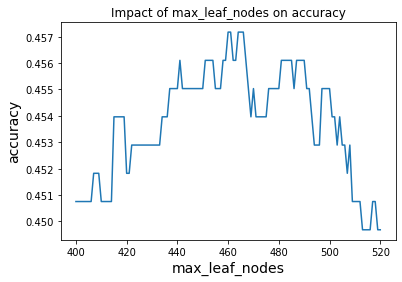

In [17]:
# Plot-1 code here
max_leaf_nodes = range(400,521)
acc = []

for n in max_leaf_nodes:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = n, n_jobs = -1, random_state = 50)
    rf_clf.fit(X_train, y_train)

    y_pred = rf_clf.predict(X_test)
    
    acc.append(sklearn.metrics.accuracy_score(y_test, y_pred))

plt.title('Impact of max_leaf_nodes on accuracy')
plt.xlabel('max_leaf_nodes', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.plot(max_leaf_nodes, acc)

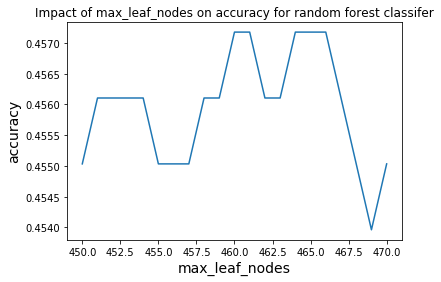

In [18]:
max_leaf_nodes = range(450,471)
acc = []

for n in max_leaf_nodes:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = n, n_jobs = -1, random_state = 50)
    rf_clf.fit(X_train, y_train)

    y_pred = rf_clf.predict(X_test)
    
    acc.append(sklearn.metrics.accuracy_score(y_test, y_pred))

plt.title('Impact of max_leaf_nodes on accuracy for random forest classifer')
plt.xlabel('max_leaf_nodes', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.plot(max_leaf_nodes, acc)

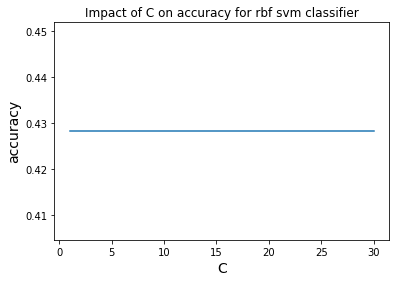

In [19]:
# Plot-2 code here
c_list = range(1,31)
acc = []

for c in c_list:
    SVMClassifier = svm.SVC(kernel='rbf', gamma=10, C=c)
    SVMClassifier.fit(X_train, y_train)

    y_pred = SVMClassifier.predict(X_test)

    acc.append(sklearn.metrics.accuracy_score(y_test, y_pred))

plt.title('Impact of C on accuracy for rbf svm classifier')
plt.xlabel('C', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.plot(c_list, acc)

## Discussion

The best model I was able to produce for this problem was a random forest classifier that acheived approximately 45% accuracy. This is not terrible considering there were 14 classes, meaning random guessing would give 1/14 or approximately 7% accuracy, but it is still not a great result. A lot of the data in the survey was probably not strongly related to the target. Taking a look at the importance of features for the decision tree we can see that the most important features generally involved which heroes people wanted or which banners they had summoned from. The most important variable by far, at 7%, asked if the person had spent money on one particular banner. It is unsurprising to see that one have a high influence on the target. The less important features tended to be questions about people's opinions of things in game. It is worth noting that age was closer to the top (more important) of the list and gender closer to the bottom.

I also took a look at the predictions given by each model on the test set for the best performing model of each type. The best performing SVM classifer decided that it would do pretty well by just handing out 6's to everyone. 6 is the label that corresponds to "Free to Play", meaning people who don't spend money on the game. This was effective because the majority of the player base IS "Free to Play" so I guess the model picked up on that. It managed to get 42% accuracy with that strategy. The random forest model actually guessed other things, which is good, but it still only raised it's accuracy by 3% compared to the SVM model.

The neural network model did not work out. I tried a few variations on a 4 layer model (including changing number of neurons and activation functions, but I only left changing the optimizer in the notebook) but could not get any results. Most of the time the model initialized weights that gave 0 accuracy or the accuracy soon dropped to 0 during training. Using the adadelta optimizer I was sometimes able to get loss that decreased during training, but all other times it just rose uncontrollably.

For my plots I tracked the effect of max_leaf_nodes on the random forest model's accuracy and the effect of changing C in the SVM model. I noticed that increasing the max_leaf_nodes had a good effect in testing and it turned out that it was optimal in my model to raise them rather high compared to where I started. Changing c in the SVM model actually had no effect at all. That in conjunction with the "poly" SVM performing the worst of all the SVM models leads me to believe the data overall had a pretty simple or almost linear pattern.

In conclusion, for detecting individuals who are likely to spend excessive money on a gacha game, it is probably best to gather other data than just surveying people about their opinions on the game. Data on other spending habits and other demographic data that was not addressed in the survey used here would likely be particularly beneficial.

## Grading

Project grading rubric (total 100 points - 20% of the final grade):

- Project proposal: 10 points

- Final submission: 70 points - Breakdown as follows

    - 30 points: Methods, hyperparameter tuning and comparison table
    
    - 20 points: Plots

    - 20 points: Discussion (2 paragraphs)
    
- Project complexity and intellectual efforts judged by the instructor: 20 points
    
<b>Notice:</b> similar to the assignments, up to 10 points may be deducted if your notebook is not easy to read and/or has spelling/grammatical errors, so proofread your notebook!

## How to Submit and Due Date - Late Penalty Will be Strictly Applied!

Name your final project notebook ```Lastname-Project.ipynb```. Submit the notebook file with your dataset file in a zip file named EXACTLY as `Lastname-Project.zip` using the ```Final Project``` link on Blackboard. For groups, only one submission is required.

<font color=red><b>Project Final Submission Due Date: Monday Dec 9th 11:59PM.</b></font>